In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Text(0.5, 1.0, 'Customer Data')

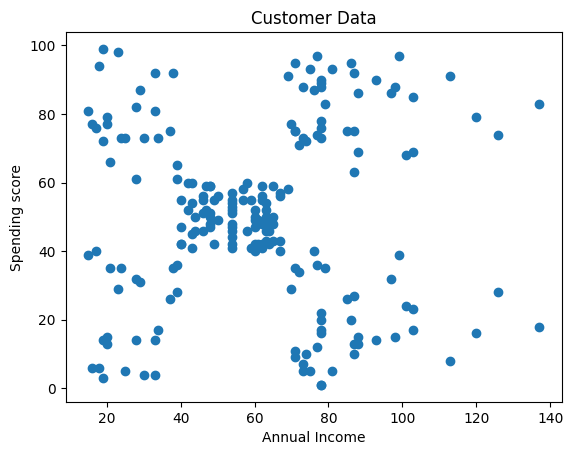

In [5]:
plt.scatter(dataset['Annual Income (k$)'],dataset["Spending Score (1-100)"])
plt.xlabel("Annual Income")
plt.ylabel("Spending score")

plt.title("Customer Data")



In [6]:
# Feature selection by using iloc method...
x=dataset.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

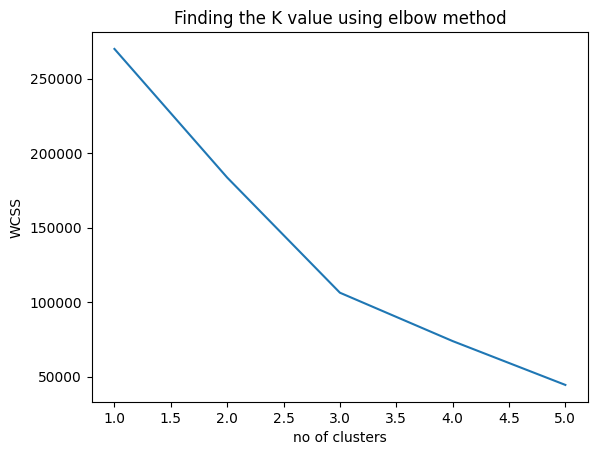

In [7]:
# selecting the no of clusters(k value) using Elbow method 
# inercia for finding sum of squares within the clusters...
from sklearn.cluster import KMeans
individual_clustering_score=[]
for i in range(1,6):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)  
    kmeans.fit(x)
    individual_clustering_score.append(kmeans.inertia_)
plt.plot(range(1,6),individual_clustering_score)
plt.title("Finding the K value using elbow method")
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.show()
    
    
    


In [8]:
individual_clustering_score

[269981.28,
 183653.32894736843,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371]

In [9]:
#to list the centroids
centroids=kmeans.cluster_centers_
centroids

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [10]:
# creating model for each found clusters(3)..and making the predictions to find the each datapoints belongs to which clusters)
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans=kmeans.fit(x)
y_kmeans=kmeans.predict(x)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [11]:
#creating a tble for the existing dataset and appending a column with that
supervised=pd.DataFrame(dataset)
supervised["Cluster_Group"]=y_kmeans
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


In [12]:
# Saving the datatable as csv
supervised.to_csv('cluster.csv',index=False)

In [13]:
supervised.columns


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_Group'],
      dtype='object')

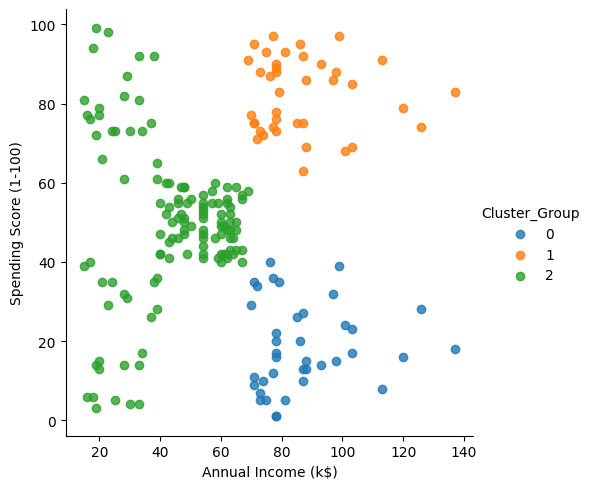

In [14]:
facts=sns.lmplot(supervised, x=supervised.columns[3],y=supervised.columns[4],hue='Cluster_Group',fit_reg=False,legend=True,
    legend_out=None,)